# 

# 데이터 불러오기


In [ ]:
# 전체 데이터중 10개 확인
SELECT *
FROM spartan-cedar-411001.modulabs_project.data
LIMIT 10;

# 행의 갯수
SELECT COUNT(*)
FROM spartan-cedar-411001.modulabs_project.data

# 결측데이터 확안
SELECT 
  COUNT(InvoiceNo) as COUNT_InvoiceNo,
  COUNT(StockCode) as COUNT_StockCode,
  COUNT(Description) as COUNT_Description,
  COUNT(Quantity) as COUNT_Quantity,
  COUNT(InvoiceDate) as COUNT_InvoiceDate,
  COUNT(UnitPrice) as COUNT_UnitPrice,
  COUNT(CustomerID) as COUNT_CustomerID,
  COUNT(Country) as COUNT_Country
  
FROM spartan-cedar-411001.modulabs_project.data
WHERE InvoiceNo IS NOT NULL

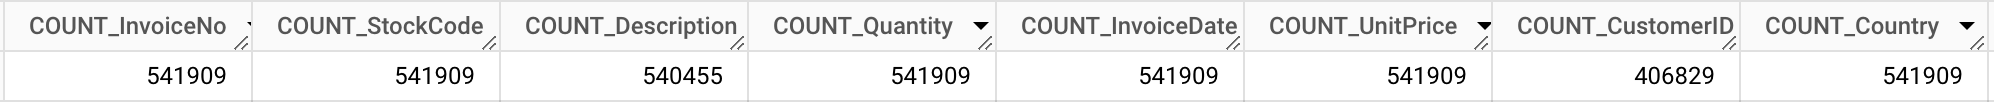

# 데이터 전처리
## 결측치
결측치처리

- CustomerID 제거
- Description 제거

In [ ]:
# 결측지 비율 계산
SELECT column_name, ROUND((total - column_value) / total * 100, 2)
FROM
(
    SELECT 'InvoiceNo' AS column_name, COUNT(InvoiceNo) AS column_value, COUNT(*) AS total FROM spartan-cedar-411001.modulabs_project.data UNION ALL
    SELECT 'StockCode' AS column_name, COUNT(StockCode) AS column_value, COUNT(*) AS total FROM spartan-cedar-411001.modulabs_project.data UNION ALL
    SELECT 'Description' AS column_name, COUNT(Description) AS column_value, COUNT(*) AS total FROM spartan-cedar-411001.modulabs_project.data UNION ALL
    SELECT 'Quantity' AS column_name, COUNT(Quantity) AS column_value, COUNT(*) AS total FROM spartan-cedar-411001.modulabs_project.data UNION ALL
    SELECT 'InvoiceDate' AS column_name, COUNT(InvoiceDate) AS column_value, COUNT(*) AS total FROM spartan-cedar-411001.modulabs_project.data UNION ALL
    SELECT 'UnitPrice' AS column_name, COUNT(UnitPrice) AS column_value, COUNT(*) AS total FROM spartan-cedar-411001.modulabs_project.data UNION ALL
    SELECT 'CustomerID' AS column_name, COUNT(CustomerID) AS column_value, COUNT(*) AS total FROM spartan-cedar-411001.modulabs_project.data UNION ALL
    SELECT 'Country' AS column_name, COUNT(Country) AS column_value, COUNT(*) AS total FROM spartan-cedar-411001.modulabs_project.data
) AS column_data;

#UNION ALL 사용
SELECT
    'InvoiceNo' AS column_name,
    ROUND(SUM(CASE WHEN InvoiceNo IS NULL THEN 1 ELSE 0 END) / COUNT(*) * 100, 2) AS missing_percentage
FROM spartan-cedar-411001.modulabs_project.data
UNION ALL
SELECT
    'StockCode' AS column_name,
    ROUND(SUM(CASE WHEN StockCode IS NULL THEN 1 ELSE 0 END) / COUNT(*) * 100, 2) AS missing_percentage
    FROM spartan-cedar-411001.modulabs_project.data
UNION ALL
SELECT
    'Description' AS column_name,
    ROUND(SUM(CASE WHEN Description IS NULL THEN 1 ELSE 0 END) / COUNT(*) * 100, 2) AS missing_percentage
  FROM spartan-cedar-411001.modulabs_project.data
UNION ALL
SELECT
    'Quantity' AS column_name,
    ROUND(SUM(CASE WHEN Quantity IS NULL THEN 1 ELSE 0 END) / COUNT(*) * 100, 2) AS missing_percentage
    FROM spartan-cedar-411001.modulabs_project.data
UNION ALL
SELECT
    'InvoiceDate' AS column_name,
    ROUND(SUM(CASE WHEN InvoiceDate IS NULL THEN 1 ELSE 0 END) / COUNT(*) * 100, 2) AS missing_percentage
  FROM spartan-cedar-411001.modulabs_project.data
UNION ALL
SELECT
    'UnitPrice' AS column_name,
    ROUND(SUM(CASE WHEN UnitPrice IS NULL THEN 1 ELSE 0 END) / COUNT(*) * 100, 2) AS missing_percentage
  FROM spartan-cedar-411001.modulabs_project.data
UNION ALL
SELECT
    'CustomerID' AS column_name,
    ROUND(SUM(CASE WHEN CustomerID IS NULL THEN 1 ELSE 0 END) / COUNT(*) * 100, 2) AS missing_percentage
  FROM spartan-cedar-411001.modulabs_project.data
UNION ALL
SELECT
    'Country' AS column_name,
    ROUND(SUM(CASE WHEN Country IS NULL THEN 1 ELSE 0 END) / COUNT(*) * 100, 2) AS missing_percentage
    FROM spartan-cedar-411001.modulabs_project.data

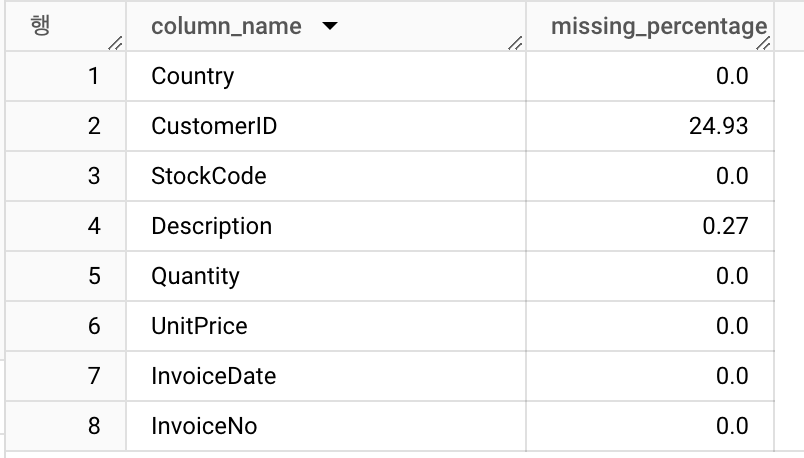

In [ ]:
# 결측치 제거
DELETE FROM spartan-cedar-411001.modulabs_project.data
WHERE CustomerID IS NULL
  OR Description IS NULL ;

## 중복값 제거

In [ ]:
SELECT COUNT(*) AS Total
FROM(
SELECT  
InvoiceNo,
  StockCode,
  Description,
  Quantity,
  InvoiceDate,
  UnitPrice,
  CustomerID,
  Country,
  COUNT(*) AS DuplicateCount
FROM spartan-cedar-411001.modulabs_project.data
GROUP BY InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country
HAVING COUNT(*) > 1
)

## 잘못 방지를 위해 새 테이블 생성

In [ ]:
SELECT COUNT(*) as new_data_toal
FROM spartan-cedar-411001.modulabs_project.distinct_data

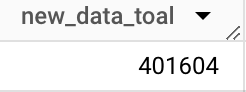

# 오류값처리

In [ ]:
#SELECT COUNT(DISTINCT InvoiceNo) as U_InvoiceNo
FROM spartan-cedar-411001.modulabs_project.distinct_data

In [ ]:
SELECT DISTINCT InvoiceNo
FROM spartan-cedar-411001.modulabs_project.distinct_data
LIMIT 100;

In [ ]:
#C로 시작하는 InvoiceNo 구하기
SELECT DISTINCT InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country
FROM spartan-cedar-411001.modulabs_project.distinct_data
WHERE InvoiceNo LIKE ('C%')
LIMIT 100;

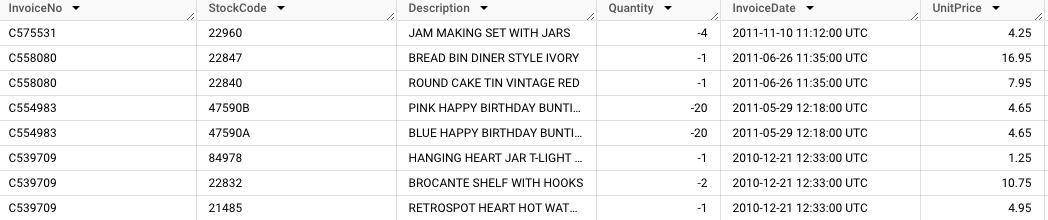

In [ ]:
# cancelled percentage
SELECT ROUND(cancelled_count / total_count * 100, 1) AS cancelled_percentage
FROM
(SELECT
  SUM(CASE WHEN InvoiceNo LIKE ('C%') THEN 1 ELSE 0 END) AS cancelled_count,
  COUNT(*) AS total_count,
  
FROM spartan-cedar-411001.modulabs_project.distinct_data
)

# StockCode 살펴보기

In [ ]:
WITH UniqueStockCodes AS (
  SELECT DISTINCT StockCode
  FROM spartan-cedar-411001.modulabs_project.distinct_data
)
SELECT
  LENGTH(StockCode) - LENGTH(REGEXP_REPLACE(StockCode, r'[0-9]', '')) AS number_count,
  COUNT(*) AS stock_cnt
FROM UniqueStockCodes
GROUP BY number_count
ORDER BY stock_cnt DESC;

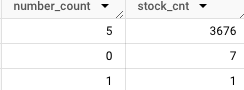

In [ ]:
SELECT DISTINCT StockCode, number_count
FROM (
  SELECT StockCode,
    LENGTH(StockCode) - LENGTH(REGEXP_REPLACE(StockCode, r'[0-9]', '')) AS number_count
  FROM spartan-cedar-411001.modulabs_project.distinct_data
) 
WHERE number_count = 0 OR number_count = 1;

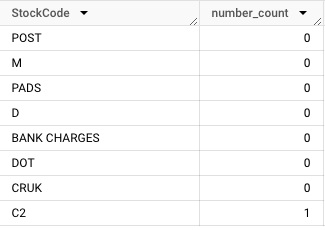

In [ ]:
#위의 내용 제거하기
DELETE FROM spartan-cedar-411001.modulabs_project.distinct_data
WHERE StockCode IN (
  SELECT DISTINCT StockCode
  FROM (
     SELECT StockCode,
    LENGTH(StockCode) - LENGTH(REGEXP_REPLACE(StockCode, r'[0-9]', '')) AS number_count
  FROM spartan-cedar-411001.modulabs_project.distinct_data
) 
WHERE number_count = 0 OR number_count = 1
);

# Description 과 UnitPrice

Description의 경우, uppercase로 구분

**단위 가격의 요약 통계량을 보면 최소 단위 가격(`min_price`)이 0인 것을 알 수 있습니다. 이는 단가가 0원인 데이터가 존재한다는 것을 의미하고, 이는 이 제품이 무료 제품이거나 데이터 오류일 수도 있다는 의미입니다. 따라서 제거**

In [1]:
-- CREATE OR REPLACE TABLE spartan-cedar-411001.modulabs_project.data_3 AS
-- SELECT
--   * EXCEPT (Description),
--    UPPER(Description) AS Description 
-- FROM spartan-cedar-411001.modulabs_project.distinct_data;
-- SELECT Description
-- FROM spartan-cedar-411001.modulabs_project.data_3
-- WHERE REGEXP_CONTAINS(Description, r'[a-z]');

--UNIT PRICE
-- SELECT MIN(UnitPrice) AS min_price, MAX(UnitPrice) AS max_price,AVG(UnitPrice) AS avg_price
-- FROM spartan-cedar-411001.modulabs_project.data_3

-- SELECT COUNT(Quantity) AS cnt_quantity, MIN(Quantity) AS min_quantity, MAX(Quantity) AS max_quantity, AVG(Quantity) AS avg_quantity
-- FROM spartan-cedar-411001.modulabs_project.data_3
-- WHERE UnitPrice = 0;

-- CREATE OR REPLACE TABLE spartan-cedar-411001.modulabs_project.data_3 AS 
-- SELECT *
-- FROM spartan-cedar-411001.modulabs_project.data_3
-- WHERE UnitPrice != 0

SyntaxError: invalid syntax (3004813750.py, line 1)

# RFMSCORE

In [ ]:
SELECT
  CustomerID, 
  EXTRACT(DAY FROM MAX(InvoiceDay) OVER () - InvoiceDay) AS recency
FROM (
  SELECT 
    CustomerID,
    MAX(DATE(InvoiceDate)) AS InvoiceDay
  FROM spartan-cedar-411001.modulabs_project.data_3
  GROUP BY CustomerID
)
ORDER BY CustomerID

# 정제후 테이블로 저장

In [ ]:
CREATE OR REPLACE TABLE spartan-cedar-411001.modulabs_project.user_r AS(
SELECT
  CustomerID, 
  EXTRACT(DAY FROM MAX(InvoiceDay) OVER () - InvoiceDay) AS recency
FROM (
  SELECT 
    CustomerID,
    MAX(DATE(InvoiceDate)) AS InvoiceDay
  FROM spartan-cedar-411001.modulabs_project.data_3
  GROUP BY CustomerID
)
ORDER BY CustomerID
)

## Frequency

In [ ]:
-- SELECT
--   CustomerID,
--   COUNT(DISTINCT InvoiceNo) AS purchase_cnt
-- FROM spartan-cedar-411001.modulabs_project.data_3
-- GROUP BY CustomerID
-- ORDER BY CustomerID
SELECT
  CustomerID,
  SUM(Quantity) AS item_cnt
FROM spartan-cedar-411001.modulabs_project.data_3
GROUP BY CustomerID
ORDER BY CustomerID

In [ ]:
-- CREATE OR REPLACE TABLE spartan-cedar-411001.modulabs_project.user_rf AS

-- -- (1) 전체 거래 건수 계산
-- WITH purchase_cnt AS ( 
--   SELECT
--   CustomerID,
--   COUNT(DISTINCT InvoiceNo) AS purchase_cnt
-- FROM spartan-cedar-411001.modulabs_project.data_3
-- GROUP BY CustomerID
-- ),

-- -- (2) 구매한 아이템 총 수량 계산
-- item_cnt AS (
--   SELECT
--   CustomerID,
--   SUM(Quantity) AS item_cnt
--   FROM spartan-cedar-411001.modulabs_project.data_3
--   GROUP BY CustomerID
-- )

-- -- 기존의 user_r에 (1)과 (2)를 통합
-- SELECT
--   pc.CustomerID,
--   pc.purchase_cnt,
--   ic.item_cnt,
--   ur.recency
-- FROM purchase_cnt AS pc
-- JOIN item_cnt AS ic
--   ON pc.CustomerID = ic.CustomerID
-- JOIN spartan-cedar-411001.modulabs_project.user_r AS ur
--   ON pc.CustomerID = ur.CustomerID;

-- SELECT
--   CustomerID,
--   ROUND(SUM(UnitPrice * Quantity) , 1) AS user_total
-- FROM spartan-cedar-411001.modulabs_project.data_3
-- GROUP BY CustomerID
-- ORDER BY CustomerID



## Monetary

In [ ]:
SELECT
  CustomerID,
  ROUND(SUM(UnitPrice) , 1) AS user_total
FROM spartan-cedar-411001.modulabs_project.data_3
GROUP BY CustomerID

In [ ]:
SELECT
  rf.CustomerID AS CustomerID,
  rf.purchase_cnt,
  rf.item_cnt,
  rf.recency,
  ut.user_total,
  ut.user_total/rf.purchase_cnt AS user_average
FROM spartan-cedar-411001.modulabs_project.user_rf rf
LEFT JOIN (
  -- 고객 별 총 지출액
  SELECT
  CustomerID,
  ROUND(SUM(UnitPrice*Quantity) , 0) AS user_total
  FROM spartan-cedar-411001.modulabs_project.data_3
  GROUP BY CustomerID

) ut
ON rf.CustomerID = ut.CustomerID;

In [ ]:
#rfm table 만들기
-- CREATE OR REPLACE TABLE spartan-cedar-411001.modulabs_project.user_rfm AS   
-- SELECT
--   rf.CustomerID AS CustomerID,
--   rf.purchase_cnt,
--   rf.item_cnt,
--   rf.recency,
--   ut.user_total,
--   ut.user_total/rf.purchase_cnt AS user_average
-- FROM spartan-cedar-411001.modulabs_project.user_rf rf
-- LEFT JOIN (
--   -- 고객 별 총 지출액
--   SELECT
--   CustomerID,
--   ROUND(SUM(UnitPrice*Quantity) , 0) AS user_total
--   FROM spartan-cedar-411001.modulabs_project.data_3
--   GROUP BY CustomerID

-- ) ut
-- ON rf.CustomerID = ut.CustomerID;

# Feature 추가 추출

In [ ]:
-- CREATE OR REPLACE TABLE spartan-cedar-411001.modulabs_project.user_data AS 
-- WITH purchase_intervals AS (
--   -- (2) 고객 별 구매와 구매 사이의 평균 소요 일수
--   SELECT
--     CustomerID,
--     CASE WHEN ROUND(AVG(interval_), 2) IS NULL THEN 0 ELSE ROUND(AVG(interval_), 2) END AS average_interval
--   FROM (
--     -- (1) 구매와 구매 사이에 소요된 일수
--     SELECT
--       CustomerID,
--       DATE_DIFF(InvoiceDate, LAG(InvoiceDate) OVER (PARTITION BY CustomerID ORDER BY InvoiceDate), DAY) AS interval_
--     FROM
--       spartan-cedar-411001.modulabs_project.data_3
--     WHERE CustomerID IS NOT NULL
--   )
--   GROUP BY CustomerID
-- )

-- SELECT u.*, pi.* EXCEPT (CustomerID)
-- FROM spartan-cedar-411001.modulabs_project.user_data AS u
-- LEFT JOIN purchase_intervals AS pi
-- ON u.CustomerID = pi.CustomerID;

#CREATE OR REPLACE TABLE spartan-cedar-411001.modulabs_project.user_data AS

-- WITH TransactionInfo AS (
--   SELECT
--     CustomerID,
--     COUNT(InvoiceNo) AS total_transactions,
--     SUM(CASE WHEN InvoiceNo LIKE ('C%') THEN 1 ELSE 0 END) AS cancel_frequency
--   FROM spartan-cedar-411001.modulabs_project.data_3
--   GROUP BY CustomerID
-- )

-- SELECT u.*, t.* EXCEPT(CustomerID), ROUND(t.cancel_frequency/t.total_transactions * 100 , 2) AS cancel_rate
-- FROM spartan-cedar-411001.modulabs_project.user_data AS u
-- LEFT JOIN TransactionInfo AS t
-- ON u.CustomerID = t.CustomerID
-- ORDER BY cancel_rate DESC

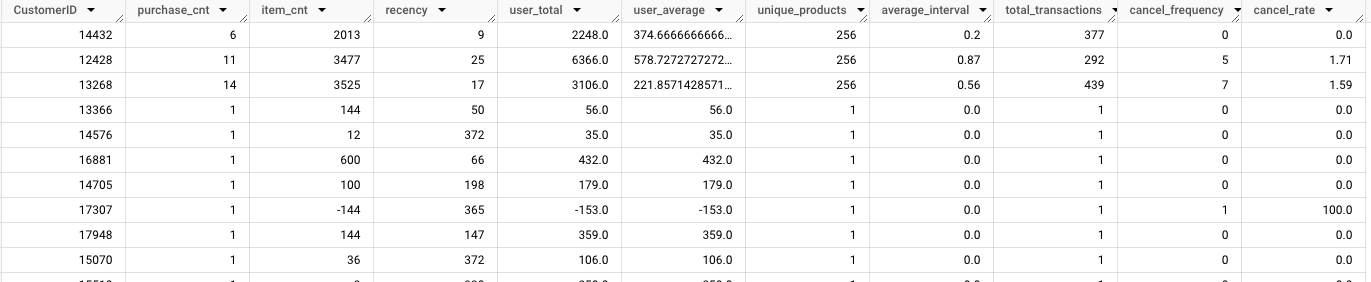

# 회고

전체적인 코드는 완성할 수 있었고, 코드 정리 및 회고의 단계에서 시간이 매우 오래 걸렸다. 여러 문제들이 있었지만, 대부분 자잘한 코드의 문제들이 많아 해결 가능하였다. 하지만, 회고의 과정에서 내가 썼던 SQL 코드를 찾는게 힘들었다.

### 안된거 : ratio 구하기
전체 집계가 안되어 포기했지만, 필요한 부분은 구했기에 일단 넘어갔다.


In [ ]:

-- WITH TEMP_T AS (
-- SELECT DISTINCT StockCode, number_count
-- FROM (
--   SELECT StockCode,
--     LENGTH(StockCode) - LENGTH(REGEXP_REPLACE(StockCode, r'[0-9]', '')) AS number_count
--   FROM spartan-cedar-411001.modulabs_project.distinct_data
-- ) 
-- WHERE number_count = 0 OR number_count = 1
-- ),
-- M AS(
--   SELECT DISTINCT StockCode
--   FROM Temp_T
-- )
-- SELECT COUNT(d.StockCode IN M.StockCode) AS MatchingCount,
--        COUNT(d.StockCode) / COUNT(MatchingStockCodes.StockCode) AS Ratio
-- FROM spartan-cedar-411001.modulabs_project.distinct_data as d